In [44]:
% load_ext autoreload
% autoreload 2

import math

import numpy as np

import matplotlib
from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from src.datasets.multivariate_anomaly_function import MultivariateAnomalyFunction
from src.datasets.synthetic_multivariate_dataset import SyntheticMultivariateDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


TODO:
- XOR (Anomaly -> gleichzeitig)
- Ableitung (Geschwindigkeit vs Beschleunigung)
- Invers

## Test pipeline implementation

In [2]:
dataset = MultivariateAnomalyFunction.get_multivariate_dataset(length=1000, method='doubled')
X_train, y_train, X_test, y_test = dataset.data()

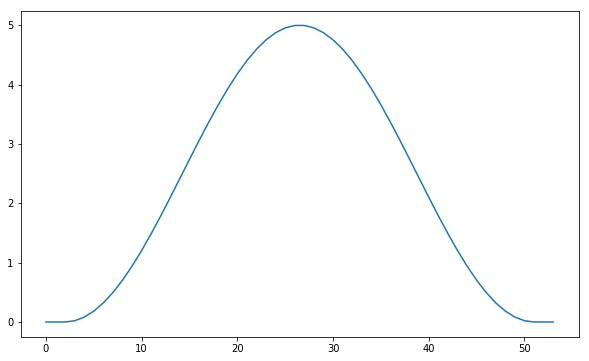

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(np.concatenate([[0, 0], SyntheticMultivariateDataset.get_curve(50, 5), [0, 0]]))

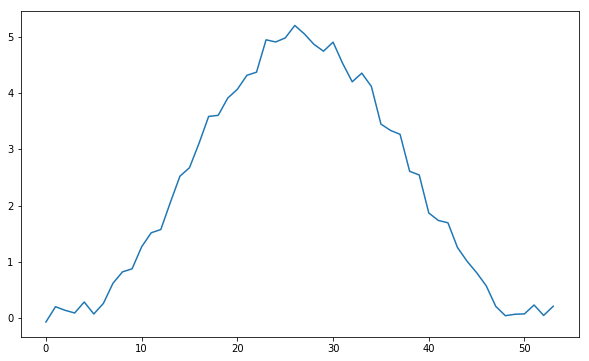

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(SyntheticMultivariateDataset.get_noisy_value(np.concatenate([[0, 0], SyntheticMultivariateDataset.get_curve(50, 5), [0, 0]]), strength=0.5))

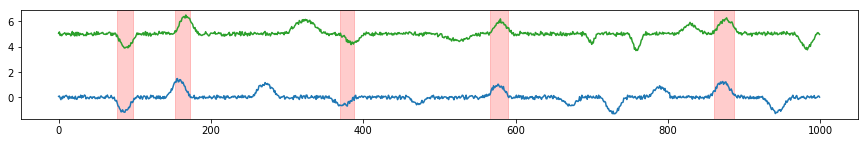

In [2]:
dataset = MultivariateAnomalyFunction.get_multivariate_dataset(length=1000, values_range=(0, 5), method='xor', test_pollution=0.5, global_noise=0.2)
X_train, y_train, X_test, y_test = dataset.data()
fig, ax = plt.subplots(1, 1, figsize=(15, 2))
X_test.plot(ax=ax, color=['C0', 'C2'], legend=False)
starts = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(1) == 0)]
ends = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(-1) == 0)]
for start_idx, end_idx in zip(starts, ends):
    ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
fig.savefig('fixed-xor-labelling.pdf')

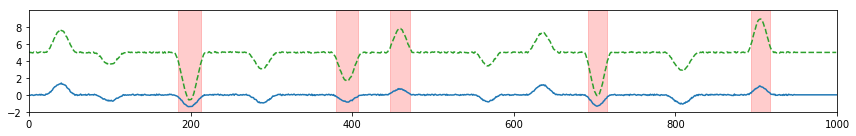

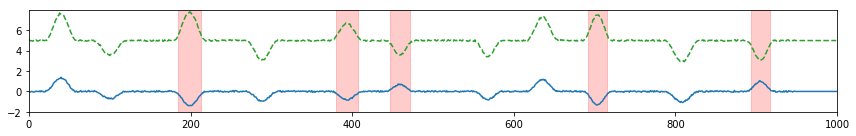

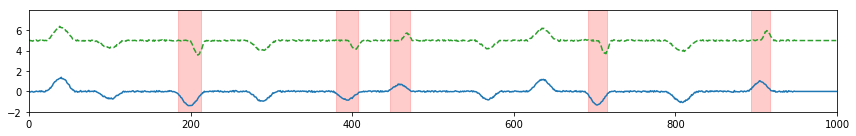

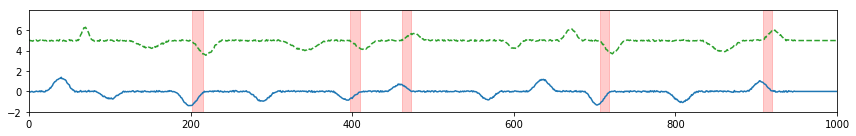

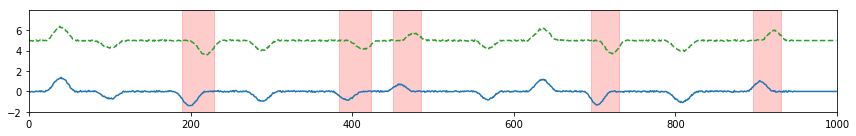

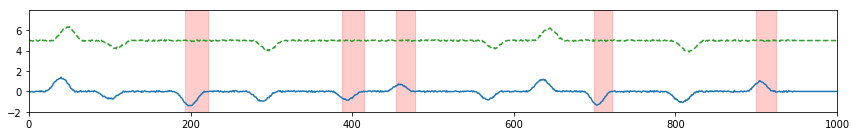

In [54]:
random_seed = 55

def plot_dataset(X_train, X_test, y_test, title, show_legend=False):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    # X_train.rename(columns={0: 'Dimension 1', 1: 'Dimension 2'}).plot(ax=axes[0], legend=show_legend)
    X_test[0].plot(ax=ax, legend=show_legend, color='C0', linestyle='-')
    X_test[1].plot(ax=ax, legend=show_legend, color='C2', linestyle='--')
    ax.set_xlim((0, 1000))
    # Same range for all plots (avoid outside of range values)
    ax.set_ylim((-2, max(8, math.ceil(max(X_test[1] + 0.1)))))
    ax.set_yticks(np.arange(-2, ax.get_ylim()[1], 2))
#     axes[0].set_ylim((-5, 6))
#     axes[1].set_ylim((-5, 6))
    
    starts = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(1) == 0)]
    ends = np.arange(0, len(y_test))[(y_test == 1) & (y_test.shift(-1) == 0)]
    for start_idx, end_idx in zip(starts, ends):
        ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
    
    fig.tight_layout()
    
    # Avoid overlapping title and axis labels
    fig.subplots_adjust(top=0.9, hspace=0.7)
    fig.savefig(f'Multivariate-Dataset-{title}.pdf')
    # fig.suptitle(rf'Multivariate dataset: ${title}$')

def generate_and_plot_dataset(dim2_name):
    dataset = MultivariateAnomalyFunction.get_multivariate_dataset(
        length=1000, method=dim2_name, values_range=(0, 5), test_pollution=0.4,
        random_seed=random_seed,
    )
    X_train, y_train, X_test, y_test = dataset.data()
    plot_dataset(X_train, X_test, y_test, dim2_name)

generate_and_plot_dataset('doubled')
generate_and_plot_dataset('inversed')
generate_and_plot_dataset('shrinked')
generate_and_plot_dataset('xor')
generate_and_plot_dataset('delayed')
generate_and_plot_dataset('delayed_missing')

In [7]:
labels = ['DAGMM with Window', 'LSTMED', 'Recurrent EBM']
data = [
    [
        0.53,
        0.66,
        0.68,
        0.78,
        0.82,
    ],
    [
        0.58,
        0.65,
        0.71,
        0.78,
        0.81,
    ],
    [
        0.50,
        0.60,
        0.69,
        0.70,
        0.80,
    ],
]


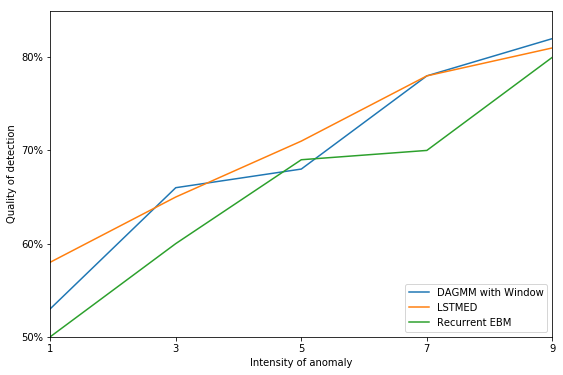

In [8]:
# font = {'size'   : 16}

# matplotlib.rc('font', **font)

plt.figure(figsize=(9, 6))
plt.plot(data[0], label=labels[0])
plt.plot(data[1], label=labels[1])
plt.plot(data[2], label=labels[2])
plt.ylim((0.5, 0.85))
plt.xlim((1, 4))
plt.yticks([0.5, 0.6, 0.7, 0.8], ['50%', '60%', '70%', '80%'])
plt.xticks(np.arange(5), [1, 3, 5, 7, 9])
plt.xlabel('Intensity of anomaly')
plt.ylabel('Quality of detection')
plt.legend(loc=4)
plt.show()